In [1]:
import numpy as np
import pandas as pd

In [2]:
data_raw = pd.read_parquet("datasets/vhr.parquet.gzip")

drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161220 entries, 0 to 2161219
Data columns (total 39 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   vin                       object 
 1   collect_ts                int64  
 2   uuid                      object 
 3   model_name                object 
 4   series_code               object 
 5   msg_create_time           object 
 6   vcu_VehicleMode           float32
 7   vcu_vehicleSpeed          float32
 8   VCU_VehicleSpeedValid     float32
 9   vcu_state                 float32
 10  bms_SOC                   float32
 11  bms_state                 float32
 12  BCM_ebs_U_BATT            float32
 13  BCM_ebs_SOC               float32
 14  BCM_ebs_SOH_SUL           float32
 15  BCM_ebs_SOC_STATE         float32
 16  BCM_ebs_SOH_SUL_STATE     float32
 17  bcm_12VBatterySOC         float32
 18  dcdc_realOutputVoltage    float32
 19  dcdc_realOutputCurrent    float32
 20  DCDC_AlerState          

In [ ]:
data_raw.head(20)

In [8]:
# 填充操作
MAS00198 = data_raw[data_raw.vin == "LM8F7D893MAS00537"].fillna(method='ffill').sort_values(by="collect_ts")
MAS00198.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235211 entries, 2053230 to 1498786
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       235211 non-null  object 
 1   collect_ts                235211 non-null  int64  
 2   uuid                      235211 non-null  object 
 3   model_name                235211 non-null  object 
 4   series_code               235211 non-null  object 
 5   msg_create_time           235211 non-null  object 
 6   vcu_VehicleMode           235211 non-null  float32
 7   vcu_vehicleSpeed          235211 non-null  float32
 8   VCU_VehicleSpeedValid     235211 non-null  float32
 9   vcu_state                 235211 non-null  float32
 10  bms_SOC                   235211 non-null  float32
 11  bms_state                 235211 non-null  float32
 12  BCM_ebs_U_BATT            235202 non-null  float32
 13  BCM_ebs_SOC               235202 non-null 

In [ ]:
MAS00198 = MAS00198[MAS00198["BCM_ebs_U_BATT"] > 7.]
MAS00198.info()

In [ ]:
pd.DataFrame(MAS00198["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')


In [ ]:
import matplotlib.pyplot as plt
MAS00198.BCM_ebs_U_BATT.hist(bins=10, figsize=(15,3))
plt.show()

In [9]:
MAS00198_copy = MAS00198.copy()

MAS00198_copy['date'] = pd.to_datetime(MAS00198_copy["collect_ts"], unit='ms')

MAS00198_copy = MAS00198_copy.set_index("date")
MAS00198_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature,BCM_EBSHvoffset,bcm_pepsPowerMode,bms_iLimitDrive,bms_iLimitRegen,bms_pLimitDrive,bms_pLimitRegen,bcm_HvOnRequest
date,,,,,,,,,,,,,,,,,,,,,
2023-04-02 08:55:30.250,LM8F7D893MAS00537,1680425730250,LM8F7D893MAS00537#1681982720181#8000,B24DRF6EP2L01,SERES-X1,1681939478170,1.0,0.0,0.0,0.0,...,2.0,0.0,28.0,1.0,1.0,543.599976,-424.0,146.0,-139.75,0.0
2023-04-02 08:55:31.250,LM8F7D893MAS00537,1680425731250,LM8F7D893MAS00537#1681982720181#8000,B24DRF6EP2L01,SERES-X1,1681939478170,1.0,0.0,0.0,0.0,...,2.0,0.0,28.0,1.0,1.0,543.599976,-424.0,146.0,-139.75,0.0
2023-04-02 08:55:32.250,LM8F7D893MAS00537,1680425732250,LM8F7D893MAS00537#1681982720181#8000,B24DRF6EP2L01,SERES-X1,1681939478170,1.0,0.0,0.0,0.0,...,2.0,0.0,28.0,1.0,1.0,543.599976,-424.0,146.0,-139.75,0.0
2023-04-02 08:55:33.250,LM8F7D893MAS00537,1680425733250,LM8F7D893MAS00537#1681982720181#8000,B24DRF6EP2L01,SERES-X1,1681939478170,1.0,0.0,0.0,0.0,...,2.0,0.0,29.0,1.0,1.0,543.599976,-424.0,146.0,-139.75,0.0
2023-04-02 08:55:34.250,LM8F7D893MAS00537,1680425734250,LM8F7D893MAS00537#1681982720181#8000,B24DRF6EP2L01,SERES-X1,1681939478170,1.0,0.0,0.0,0.0,...,2.0,0.0,29.0,1.0,1.0,543.599976,-424.0,146.0,-139.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19 02:15:21.696,LM8F7D893MAS00537,1681870521696,LM8F7D893MAS00537#1681982005680#5668,B24DRF6EP2L01,SERES-X1,1681915852966,1.0,0.0,0.0,0.0,...,2.0,0.0,28.0,1.0,2.0,926.599976,-350.0,254.5,-119.50,0.0
2023-04-19 02:15:22.696,LM8F7D893MAS00537,1681870522696,LM8F7D893MAS00537#1681982005680#5668,B24DRF6EP2L01,SERES-X1,1681915852966,1.0,0.0,0.0,0.0,...,2.0,0.0,28.0,1.0,2.0,926.599976,-350.0,254.5,-119.50,0.0
2023-04-19 02:15:23.696,LM8F7D893MAS00537,1681870523696,LM8F7D893MAS00537#1681982005680#5668,B24DRF6EP2L01,SERES-X1,1681915852966,1.0,0.0,0.0,0.0,...,2.0,0.0,28.0,1.0,2.0,926.599976,-350.0,254.5,-119.50,0.0


In [ ]:
MAS00198_copy["2023-04-02 02:55:00":"2023-04-18 03:01:00"].loc[:, ["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]]

In [ ]:
import matplotlib.pyplot as plt

MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 04:01:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(10, 3))

# extra code – saves the figure for the book
plt.show()

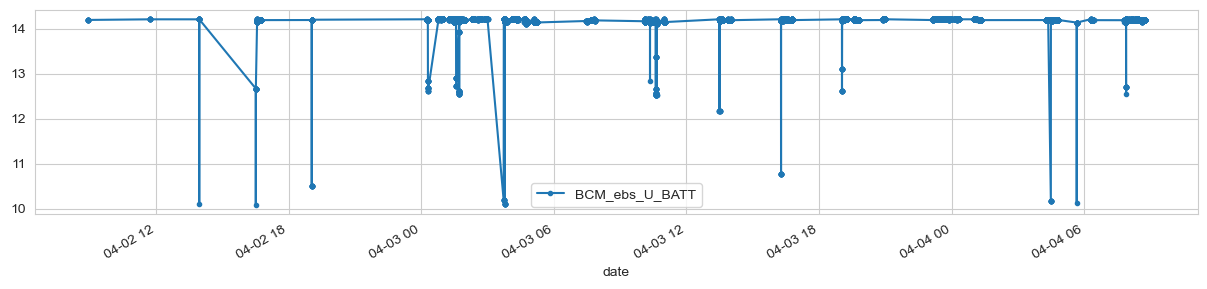

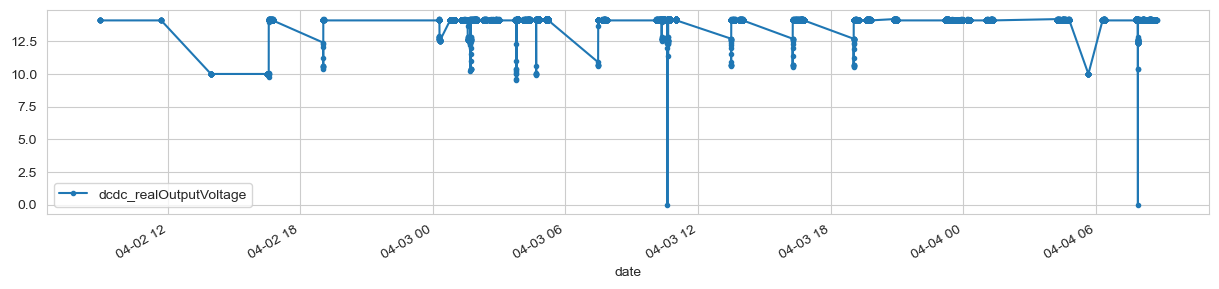

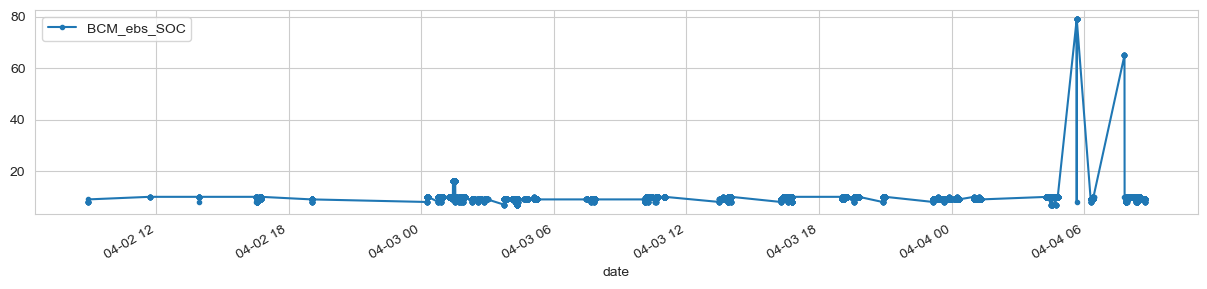

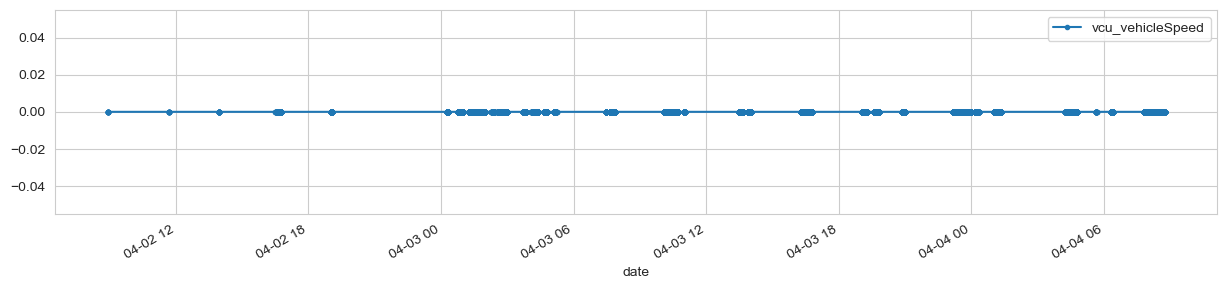

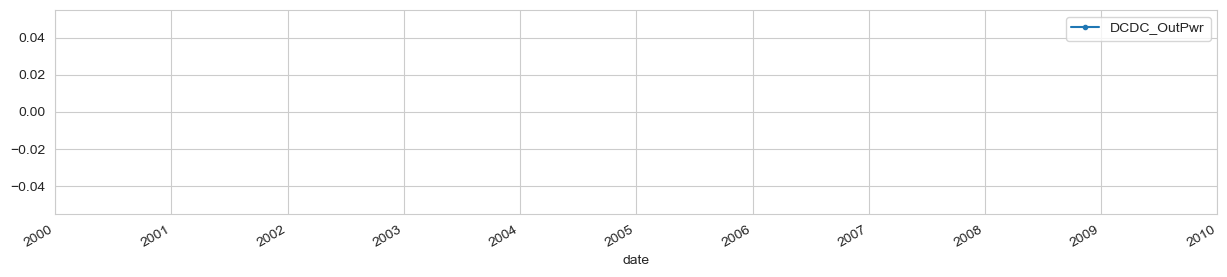

In [10]:
import matplotlib.pyplot as plt

MAS00198_copy["2023-04-02 02:55:00":"2023-04-05 04:01:00"][["BCM_ebs_U_BATT"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy["2023-04-02 02:55:00":"2023-04-05 04:01:00"][["dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy["2023-04-02 02:55:00":"2023-04-05 04:01:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy["2023-04-02 02:55:00":"2023-04-05 04:01:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
MAS00198_copy["2023-04-02 02:55:00":"2023-04-05 04:01:00"][["DCDC_OutPwr"]].plot(grid=True, marker=".", figsize=(15, 3))
# extra code – saves the figure for the book
plt.show()